<div style="font-weight: bold; font-size: 2rem; padding-top: 20px; margin: 20px 0; border-top: 2px solid #000;">
    Section 1.1: Dimensionality Reduction
</div>
<div style="font-size: 1.5rem; line-height: 2.5rem; padding-bottom: 30px;">
    Purpose: reduces amount of time and memory required by algorithms/eliminate noise<br/>
    (Transformations/Mathmatics) Linear (PCA/SVD) or non-linear (t-SNE) && Supervised or unsupervised<br/><br/>
    <b>Principle Component Analysis</b>:<br/>
    Goal is to find a projection that captures the <i>largest amount of variation in data</i>. Such a projection of the data also best represents the data in the <i>least square sense</i> 
</div>

${\displaystyle{
    min ||x - \hat{x}||^2 \\
    \text{where }\hat{x}\text{ is the approximation of x}
}}$

<div style="padding-top: 15px;">
    Goal is to capture the axis with most variation, therefore showing the most important axis (principle axis) or, most important variable in the data.<br/>
    Only gain from PCA if there is a strong correlation in the attributes (values)<br/>
    <ul>Steps to PCA
        <li>Find eigenvectors of the sample covariance matrix using the given data</li>
        <li>Eigenvectors define the new space</li>
    </ul><br/>
    <ul>PCA Basics
        <li>take n variables and find linear combination of variables to produce a new set of variables that are
            uncorrelated</li>
        <li>Order in such a way that the new set is indexed such that y<sub>1</sub> has more variation than y<sub>2</sub> etc.
        </li>
        <li>Note: aka, Karhunen-Loeve transform, Hotelling transform, or eigenvalue analysis</li>
    </ul><br/>
</div>

${\displaystyle{
    \text{Start with n-dimensional N data vectors} \\
    x_1,x_2, \ldots , x-N \\
    \text{use linear transformation to obtain principle componenets for} \\
    y_i = A(x_i - M_x) \text{ for } i = 1, N \\
    \text{where } m_x = \frac{1}{N} \sum_{k=1}^{N}x_k, \\ 
    \text{ and A is a matrix whose rows are formed from the eigenvectors of the sample coveariance matrix}
    \text{Sample: } \\
    C_x = \frac{1}{N-1} \sum_{k=1}^{N}(x_k - m_x)(x_k - m_x)^t \\
    c_{pp} = \sigma^2_{pp} = \frac{\sum_i(x_{p_i}-m_{x_p})(x_{p_i} - m_{x_p})}{N - 1} \\
    c_{pq} = \sigma_p\sigma_q = \frac{\sum_i(x_{p_i}-m_{x_p})(x_{q_i} - m_{x_q})}{N - 1} \\
    \text{mean square error} = e_{mse}  = \sum_{j = P + 1}^n \lambda_j  \\
    \text{P accounting for data variability for first p eigen values} = P = \frac{\sum_{j=1}^p \lambda_j}{\sum_{j=1}^n \lambda_j} \\
    \text{Reminder: only use PCA when there's high correlation between attributes}
}}$


<div style="padding-top: 15px; padding-bottom: 30px;">
    To calculate the values for PCA use thee <a href="https://stattrek.com/matrix-algebra/covariance-matrix.aspx">Sample Covariance Matrix</a><br/>
    
</div>

In [11]:
#PCA Example
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

X = np.array([[7,4,3], [4,1,8],[6,3,5],[8,6,1],[8,5,7],[7,2,9],[5,3,3],[9,5,8],[7,4,5],[8,2,2]])
Xmean = np.mean(X, 0)
C = np.cov(X.T)
w,v = LA.eig(C)
A = np.array([v[:,2],v[:,1]])
Y = np.matmul(A, (X-Xmean).T)
xhat = np.matmul(A.T, Y).T + Xmean
mse = np.sum((X- xhat)**2) / 10

# print(mse)

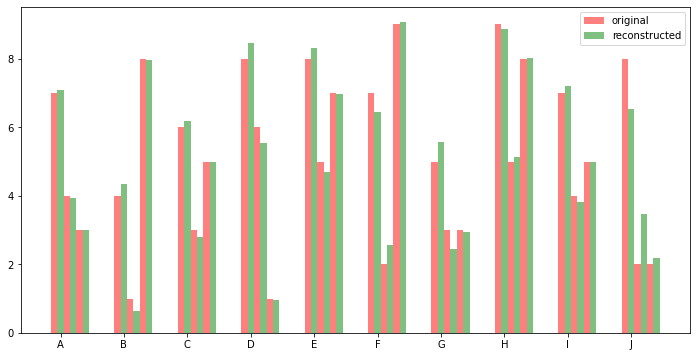

In [30]:
#plot for above
plt.figure(figsize=(12,6))
bw = .1
r1 = np.arange(len(xhat))
r2 = [x + bw for x in r1]
r3 = [x + bw for x in r2]
r4 = [x + bw for x in r3]
r5 = [x + bw for x in r4]
r6 = [x + bw for x in r5]

# col 1
plt.bar(r1, X[:,0], bw, alpha=.5, color='r', label='original')
plt.bar(r2, xhat[:,0], bw, alpha=.5, color='g', label='reconstructed')

# col 2
plt.bar(r3, X[:,1], bw, alpha=.5, color='r')
plt.bar(r4, xhat[:,1], bw, alpha=.5, color='g')

# col 3
plt.bar(r5, X[:,2], bw, alpha=.5, color='r')
plt.bar(r6, xhat[:,2], bw, alpha=.5, color='g')
plt.xticks([r + bw for r in range(len(xhat))], ['A','B','C','D','E','F','G','H','I','J'])
plt.legend()
plt.show()

<div style="font-size: 1.5rem; line-height: 2.5rem;">
    Eigenvector matrix F for SVD
</div>

${\displaystyle{
    F = \sum_{j=1}^r \lambda_j^{\frac{1}{2}}u_jv_j^t \\
    V = F^tF = \text{ matrix transpose * original} \\
    U = FF^t = \text{ matrix * its transpose}\\ 
    \text{Common definition of norm: Frobenius Norm} \\
    ||F||_{FNorm} = \sum_i\sum_jf_{ij}^2 \\
    \text{Frobenius norm from SVD} \\
    ||F||_{FNorm} = \sum_i\lambda_i^2 \\
    \text{approximation of F} \\
    \hat{F} = \sum_{j=1}^k \lambda_j^{\frac{1}{2}}u_jv_j^t\text{, where k}\leq r \\
    \text{Error approx as}\\
    \epsilon^2 = \sum_{i=1}^m\sum_{j=1}^n |f(i,j) - \hat{f}(i,j)|^2 \\
    \epsilon^2 = \sum_{p = k + 1}^r \lambda_p
}}$

<div style="padding-top: 15px; padding-bottom: 30px; border-bottom: 2px solid #000;">
    <b>Summary PCA:</b><br/>
    May or may not give good results on classification because it doesnt take into acccount class separability, 
    unsupervised<br/>
    Fisher's discriminat function (supervised PCA), used with class labels<br/>
    Only used for linear, use Kernel PCA for nonlinear<br/>
    Normalize data before applying PCA when different features have different scales
</div>


<div style="font-weight: bold; font-size: 2rem; padding-top: 20px; margin: 20px 0; border-top: 2px solid #000;">
    Section 1.2: Dimensionality reduction via feature subset selection
</div>
<div style="font-size: 1.5rem; line-height: 2.5rem; padding-bottom: 30px;">
    select subset of k features out of n original features.
</div>

${\displaystyle{
    \text{total features: } =  \frac{n!}{k!}(n-k)!
}}$


<div style="padding-top: 15px; padding-bottom: 30px;">
    <b>Evaluating Subsets</b><br/>
    Use a measure incorporating class discrimination because class separation is our ultimate aim<br/>
    Divergence and Scatter matrices based measures<br/><br/>
    <b>Entropy and Divergence</b><br/>
    Entropy is a measure of uncertainty<br/>
    An event with n possible outcomes with p<sub>i</sub> being the probability of the i-th outcome.<br/>
    The entropy H of the event is then define as:
</div>

${\displaystyle{
    H \varpropto - \sum_{i=1}^n p_i \log p_i = \sum_{i=1}^n p_i \log \frac{1}{p_i} \\
}}$

<div style="padding-top: 15px; padding-bottom: 30px;">
    <b>Kullback and Leibler Divergence (KL)</b><br/>
    In mathematical statistics, the Kullback–Leibler divergence, is a measure of how one 
    probability distribution is different from a second, reference probability distribution.<br/><br/>
    <b>Scatter Matricies</b><br/>
</div>

${\displaystyle{
    \text{Class scatter matrix} \\
    S_j = \sum_{x_i \in c_j} ()
}}

<!-- Template for sections -->
<!-- <div style="font-weight: bold; font-size: 2rem; padding-top: 20px; margin: 20px 0; border-top: 2px solid #000;">
    Section x:
</div>
<div style="font-size: 1.5rem; line-height: 2.5rem; padding-bottom: 30px; border-bottom: 2px solid #000;">
</div> -->

<!-- template for inbetween latex  -->
<!-- <div style="padding-top: 15px;"></div> -->